Training Samples: 1628 | Testing Samples: 408

 Starting Training (Gradient Descent)
Epoch 0: Cost = 0.071339
Epoch 100: Cost = 0.008087
Epoch 200: Cost = 0.003664
Epoch 300: Cost = 0.001668
Epoch 400: Cost = 0.000767
Epoch 500: Cost = 0.000360
Epoch 600: Cost = 0.000176
Epoch 700: Cost = 0.000094
Epoch 800: Cost = 0.000056
Epoch 900: Cost = 0.000039

Final Parameters: m = 0.9815, c = 0.0076


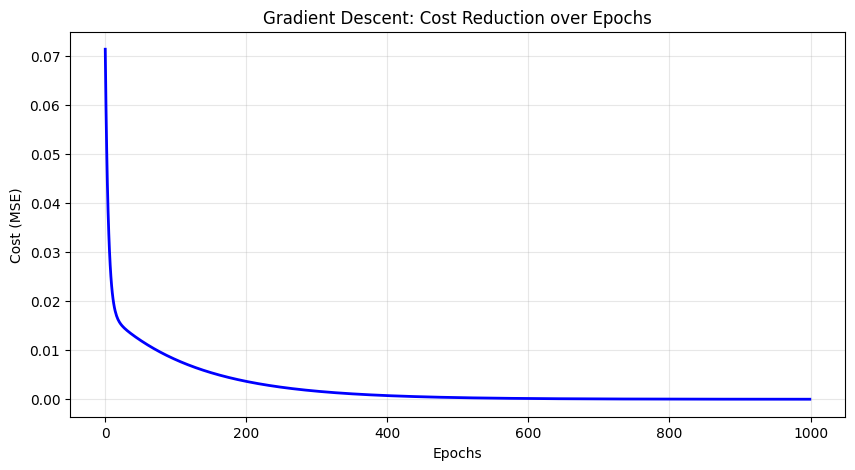

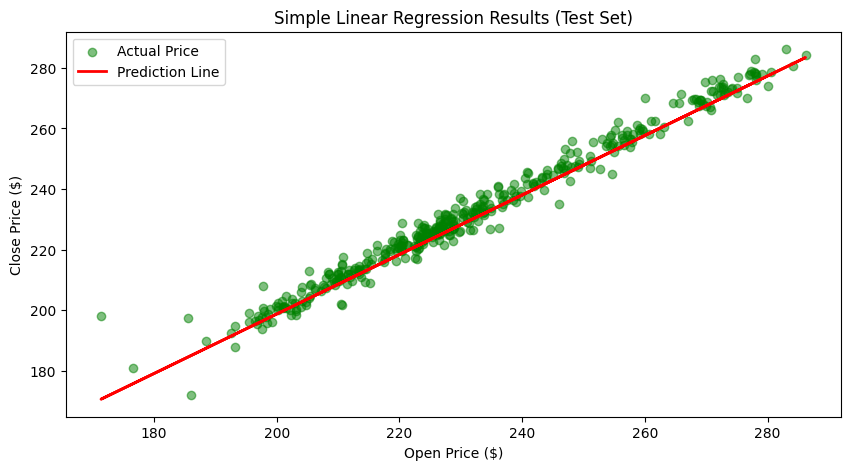


Final R² Score: 0.9716


In [9]:
#SIMPLE LINEAR REGRESSION (GRADIENT DESCENT)

# Goal: Predict 'Close' price using 'Open' price via Iterative Optimization.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# LOAD DATA & NORMALIZE

df_raw = pd.read_csv('stock_market_data.csv', header=[0,1])
data = pd.DataFrame()
data['x'] = df_raw['Open']['AAPL']
data['y'] = df_raw['Close']['AAPL']
data = data.dropna()

# Min-Max Normalization
# Formula: x_norm = (x - min) / (max - min)
x_min, x_max = data['x'].min(), data['x'].max()
y_min, y_max = data['y'].min(), data['y'].max()

X_norm = (data['x'].values - x_min) / (x_max - x_min)
y_norm = (data['y'].values - y_min) / (y_max - y_min)

# TRAIN-TEST SPLIT (80% - 20%)

split = int(len(X_norm) * 0.8)

X_train, X_test = X_norm[:split], X_norm[split:]
y_train, y_test = y_norm[:split], y_norm[split:]

print(f"Training Samples: {len(X_train)} | Testing Samples: {len(X_test)}")

#  GRADIENT DESCENT ALGORITHM

# Model: y = mx + c
# Cost Function J(m,c) = (1/2n) * Σ(pred - actual)^2

m = 0.0 # Initial Slope (Random guess)
c = 0.0 # Initial Intercept (Random guess)
alpha = 0.1  # Learning Rate (Step Size)
epochs = 1000 # Number of iterations

n = len(X_train)
cost_history = [] # To store cost at each epoch for plotting

print("\n Starting Training (Gradient Descent)")

for i in range(epochs):
    # A. Forward Pass (Prediction)
    y_pred = m * X_train + c
    
    # B. Calculate Error
    error = y_pred - y_train
    
    # C. Calculate Cost (MSE)
    cost = (1/(2*n)) * np.sum(error**2)
    cost_history.append(cost)
    
    # D. Calculate Gradients (Derivatives)
    dm = (1/n) * np.sum(error * X_train) # Derivative w.r.t m
    dc = (1/n) * np.sum(error)           # Derivative w.r.t c
    
    # E. Update Parameters (Gradient Descent Step)
    m = m - alpha * dm
    c = c - alpha * dc
    
    # Print progress every 100 epochs
    if i % 100 == 0:
        print(f"Epoch {i}: Cost = {cost:.6f}")

print(f"\nFinal Parameters: m = {m:.4f}, c = {c:.4f}")

#  VISUALIZATION: COST CONVERGENCE

# This graph shows the model "learning" over time.
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), cost_history, color='blue', linewidth=2)
plt.title('Gradient Descent: Cost Reduction over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.grid(True, alpha=0.3)
plt.show()


# VISUALIZATION: REGRESSION LINE

# Predict on Test Set (Scaled)
y_pred_scaled = m * X_test + c

# Inverse Transform (Back to Original Scale)
X_test_real = X_test * (x_max - x_min) + x_min
y_test_real = y_test * (y_max - y_min) + y_min
y_pred_real = y_pred_scaled * (y_max - y_min) + y_min

plt.figure(figsize=(10, 5))
plt.scatter(X_test_real, y_test_real, color='green', alpha=0.5, label='Actual Price')
plt.plot(X_test_real, y_pred_real, color='red', linewidth=2, label='Prediction Line')
plt.title('Simple Linear Regression Results (Test Set)')
plt.xlabel('Open Price ($)')
plt.ylabel('Close Price ($)')
plt.legend()
plt.show()

# EVALUATION

ss_res = np.sum((y_test_real - y_pred_real)**2)
ss_tot = np.sum((y_test_real - np.mean(y_test_real))**2)
r2 = 1 - (ss_res / ss_tot)

print(f"\nFinal R² Score: {r2:.4f}")